In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


### First, let's import the dataset from the github upload

In [2]:
#Read the CSV in from the raw github file using pd.read_csv() and take a glance using .head()
data = pd.read_csv('https://raw.githubusercontent.com/ConorPAnderson/adult_census_income/main/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [36]:
#Let's get some information about the dataset first
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


### Now, let's do some exploratory analysis.

In [3]:
#Age Range
#Sort the dataframe by age for an easier visual, then subset by age, taking unique values and making sure no errors
data.sort_values('age')['age'].unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 90], dtype=int64)

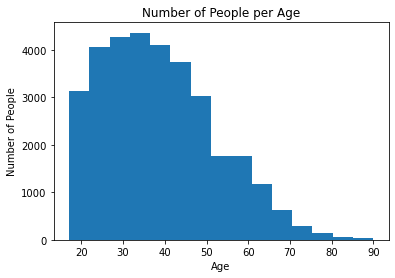

In [4]:
#Age distribution
#Create a histogram using plt.hist and our age column, using 15 bins
plt.hist(data['age'], bins = 15)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Number of People per Age')
plt.show()

In [5]:
#Age Statistics
#Using .describe() to show our mean, median and stdev most importantly
data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [6]:
#Check for null values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
#Let's look at every unique value in each column
#Using a for loop, print the name of the column and then the unique values in each column
for col in data:
    print(col)
    print(data[col].unique())

age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
fnlwgt
[ 77053 132870 186061 ...  34066  84661 257302]
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-

### After looking at the data, we see we have a large number of categorical variables, including the variable we want to predict, income > or < 50k. We will need to engineer that feature in order to do numerical and categorical analysis, however we can engineer the other features later when we want to apply a model to them... for now, here is a list of features we can change.

### Feature engineering to do list (prior to exporatory analysis)
 - Adjust for "?" in workclass, occupation, and native.country (give them the mode value)
 - Map 0 and 1 to our predictor column, <=50k or >=50k
 - Map 0 and 1 to the sex column (Male vs Female)
 - Map 0 and 1 to marital status (define whether the category is married vs not-married, then apply that)
 - Map 0 and 1 to race (white vs non-white)
 - Map 0 and 1 to native.country (US-born vs non-US-born)
 - Map 0 and 1 to workclass (define first, working vs non-working)
 - Map 0 and 1 to occupation (define first, blue collar vs white collar

In [8]:
#Replace the categorical variables with numerical variables
data['income'] = data['income'].replace({'<=50K':0, '>50K' :1})

In [9]:
#Check to make sure it worked by calling value_counts()
data['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

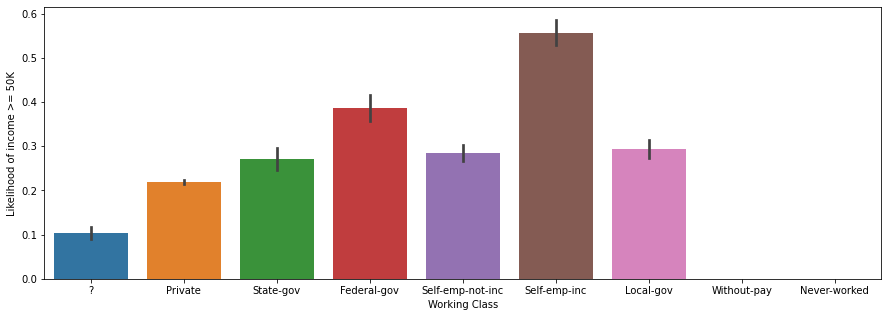

In [10]:
#Let's visualize how each categorical variable relates to income, starting with ['workclass']
plt.figure(figsize = (15,5))
sns.barplot(x = data['workclass'], y = data['income'])
plt.xlabel('Working Class')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Those who are self-employed (incorporated) and work for the federal government are most likely to have incomes greater than 50k/year
### - Private and state employees are least likely
### - No easy grouping here

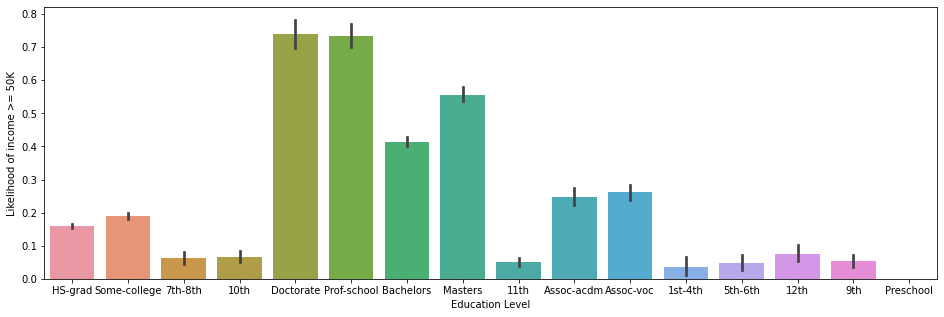

In [11]:
plt.figure(figsize = (16,5))
sns.barplot(x = data['education'], y = data['income'])
plt.xlabel('Education Level')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Just over 3/4ths of all those with a Doctorate or PhD earn >50K 
### - All who did not complete high school have less than 10% likelihood of earning >50K
### - Group by college grad (1) vs non-college grad (0)

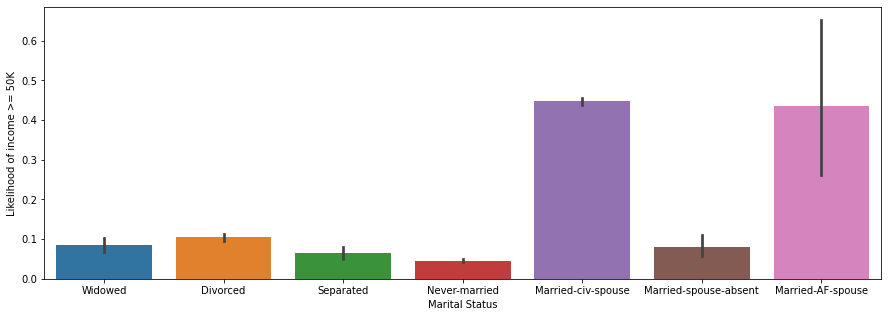

In [12]:
plt.figure(figsize = (15,5))
sns.barplot(x = data['marital.status'], y = data['income'])
plt.xlabel('Marital Status')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Those with Civillian spouses and Armed Forces spouses are 3-5x more likely to be >50K than the other Marital Statuses
### -  Group by Married, spouse in life (1) vs non-married, no partner (0)

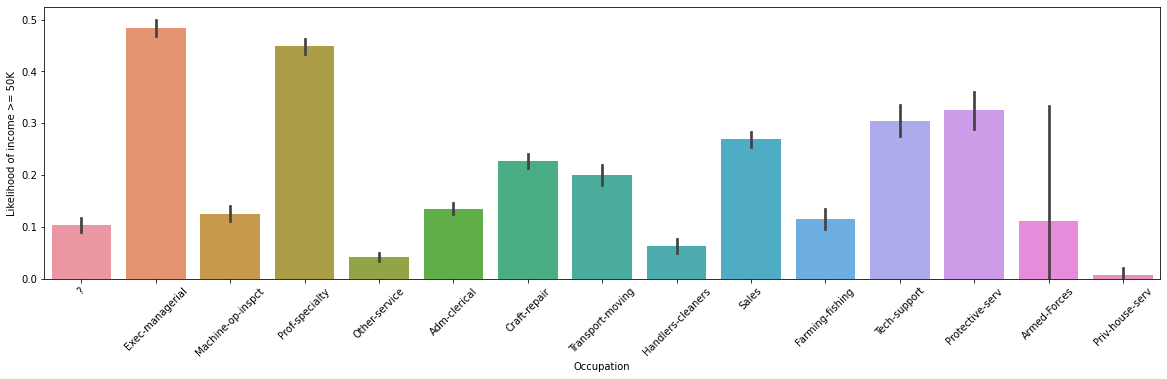

In [13]:
plt.figure(figsize = (20,5))
sns.barplot(x = data['occupation'], y = data['income'])
plt.xlabel('Occupation')
plt.ylabel('Likelihood of income >= 50K')
plt.xticks(rotation = 45)
plt.show()

### - Executive/Managerial and Professor/Specialty occupations are the most likely to earn >50K
### - Sales, Tech support, and Protective Service are the only others to have a >25% chance to earn more than 50K
### - White collar = Exec-managerial, Prof-specialty, Tech-support, Sales

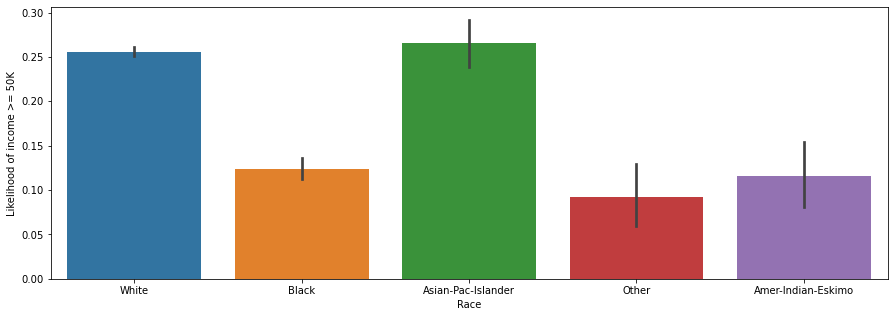

In [14]:
plt.figure(figsize = (15,5))
sns.barplot(x = data['race'], y = data['income'])
plt.xlabel('Race')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Asian/Pacific Islanders are the most likely to earn >50K
### - All non white/asian races have less than 13% probability to earn >50K/year
### - Original idea was White = 1, Non-white = 0, but may switch to White/Asian = 1

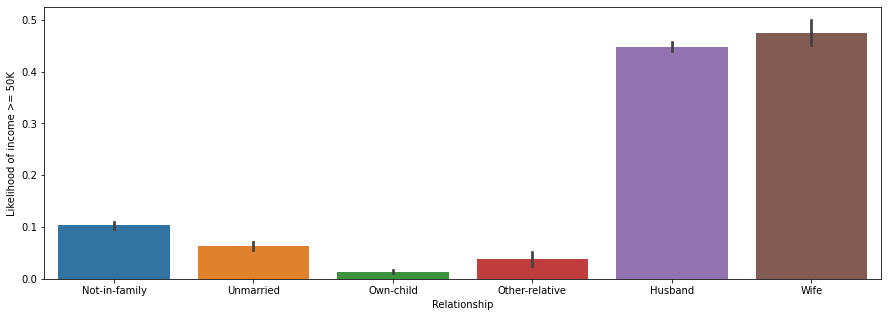

In [15]:
plt.figure(figsize = (15,5))
sns.barplot(x = data['relationship'], y = data['income'])
plt.xlabel('Relationship')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Men with wives are the most likely to earn >50K/year
### - Women with Husbands are slightly less likely to earn 50K/year than their counterparts
### - Those unmarried, without family, living with relatives or single parents are all less than 10% likely to make >50K
### - Split into Husband/Wife = 1, Non-marriage relationship = 0

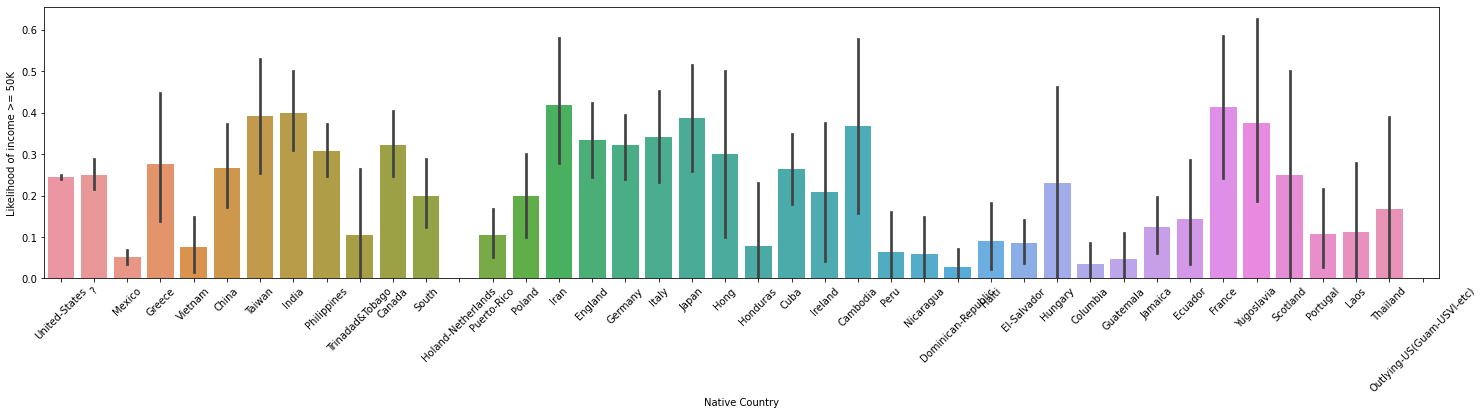

In [16]:
plt.figure(figsize = (25,5))
sns.barplot(x = data['native.country'], y = data['income'])
plt.xlabel('Native Country')
plt.ylabel('Likelihood of income >= 50K')
plt.xticks(rotation = 45)
plt.show()

### - While many countries have a higher likelihood of a >50K income than the United States, the black bars are confidence intervals so the the larger the bar the greater the range of outcomes
### - Can do US 1, other country 0 but it may not have much statistical significance. Only inkling is the error bars

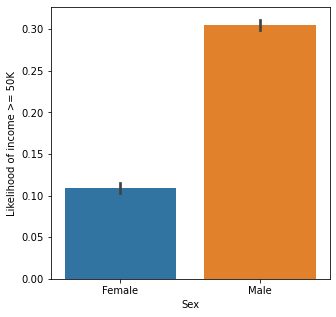

In [17]:
plt.figure(figsize = (5,5))
sns.barplot(x = data['sex'], y = data['income'])
plt.xlabel('Sex')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Males are more than twice as likely to make >50K/year in our dataset
### - Men get 1, women get 0

In [29]:
for col in data:
    print(col)
    print(data[col].unique())

age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
fnlwgt
[ 77053 132870 186061 ...  34066  84661 257302]
education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-

## Feature engineering list after exploratory analysis
### Reassign these categorical variables...

- native.country 
        - 'United States' = 1
        - all others = 0
- relationship
        - 'Husband' or 'Wife' = 1
        - 'Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' = 0
- race
        - 'White' or 'Asian-Pac-Islander' = 1
        - 'Black' or 'Other' or 'Amer-Indian-Eskimo' = 0
- sex
        - 'Male' = 1
        - 'Female' = 0
- 

# Now let's look at numerical variables

In [18]:
#Let's grab the numerical values
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [19]:
#Let's create a new dataframe with just our numerical variables
numericals = data[['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']]
numericals.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,4356,40,0
1,82,132870,9,0,4356,18,0
2,66,186061,10,0,4356,40,0
3,54,140359,4,0,3900,40,0
4,41,264663,10,0,3900,40,0


In [20]:
#.corr() creates a correlation matrix
numericals.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

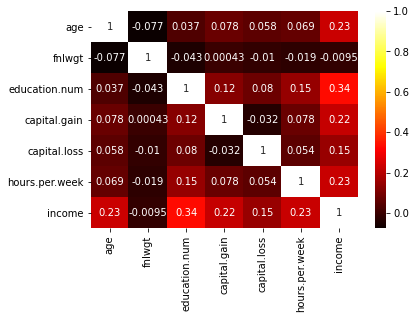

In [21]:
#Let's plot the correlation matrix on a heat map
sns.heatmap(numericals.corr(), annot = True, cmap = 'hot')

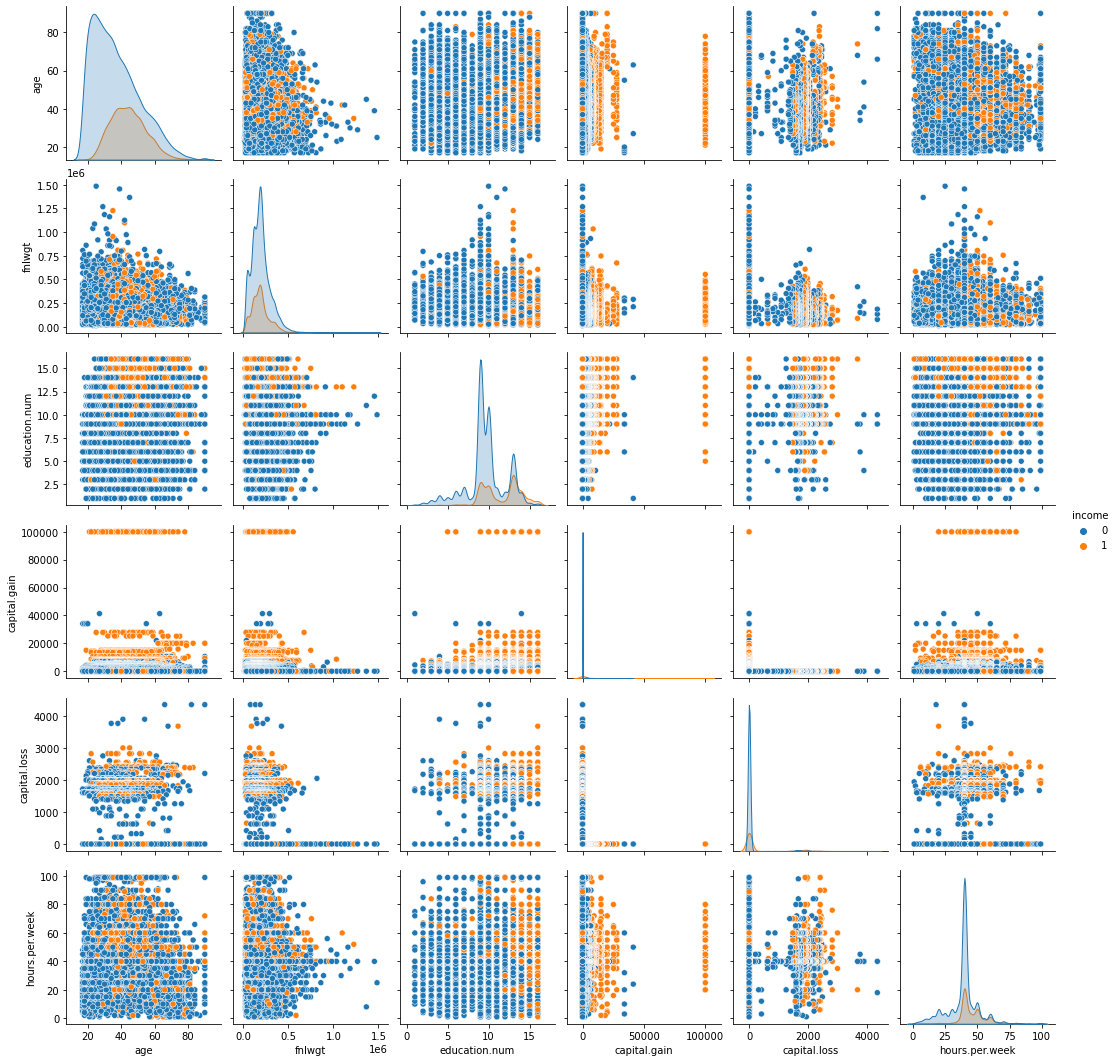

In [22]:
#Similarly, a pairplot can accomplish results that are close to a correlation matrix
sns.pairplot(numericals, kind = 'scatter', hue = 'income')
plt.show()

### - Education, hours per week, age and capital gain correlate most strongly

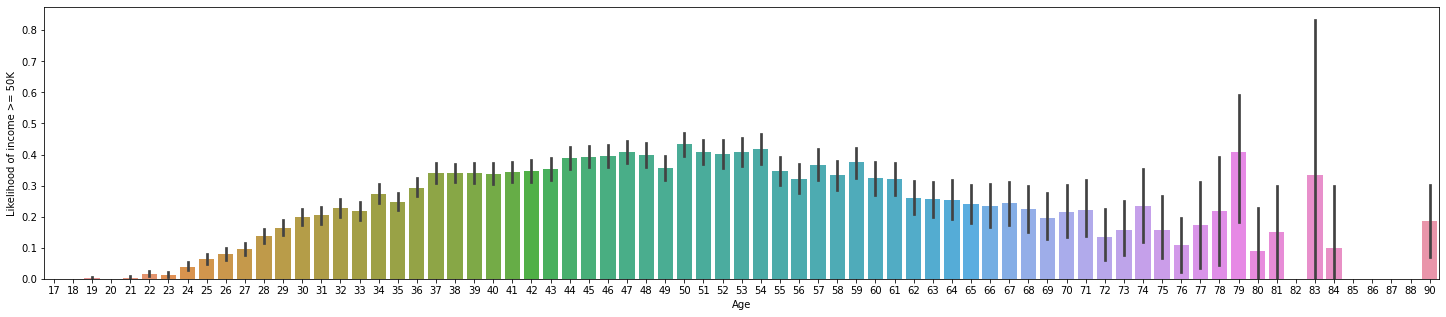

In [23]:
#Now let's visualize them individually
plt.figure(figsize = (25,5))
sns.barplot(x = data['age'], y = data['income'])
plt.xlabel('Age')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

### - Our data almost follows a normal distribution, with some outliers at the end of age that have largely varying confidence intervals

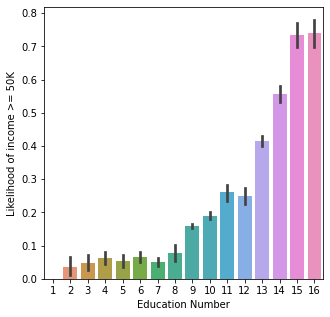

In [24]:
plt.figure(figsize = (5,5))
sns.barplot(data = data, x = data['education.num'], y = data['income'])
plt.xlabel('Education Number')
plt.ylabel('Likelihood of income >= 50K')
plt.show()

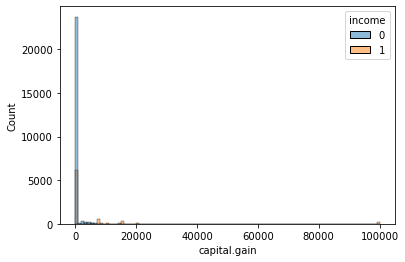

In [25]:
sns.histplot(data=data, x = 'capital.gain', hue = 'income', bins = 100)
plt.show()

In [26]:
data['capital.gain'].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114], dtype=int64)

In [28]:
data[data['capital.gain'] == 99999]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1519,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,1
1520,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,1
1521,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,1
1522,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,1
1523,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,1
1674,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,1
1675,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,1
1676,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,1


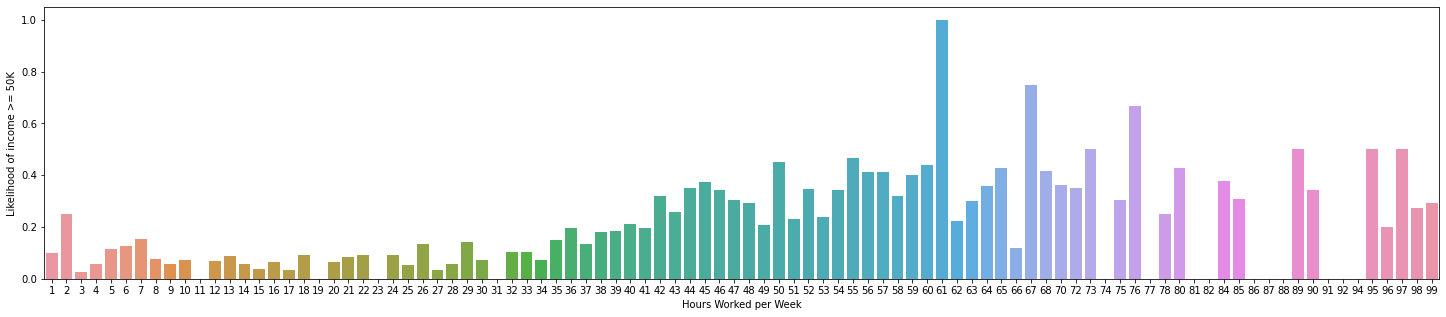

In [27]:
plt.figure(figsize = (25,5))
sns.barplot(data = data, x = data['hours.per.week'], y = data['income'], ci = None)
plt.xlabel('Hours Worked per Week')
plt.ylabel('Likelihood of income >= 50K')
plt.show()